# EDA on Haberman's Dataset Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [150]:
import warnings 

warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [213]:
# Importing the data:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Applied AI Assignments/Module_2/Haberman Dataset/haberman.csv")
df

,Age,Operation_Year,No_of_Axiallary_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


# 1. High Level Statistics:

## 1.1 Top 5 Rows:

In [182]:
df.head(5)

,Age,Operation_Year,No_of_Axiallary_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## 1.2 Number of data points:

In [183]:
df.shape[0] # no of data points
print("Number of data points :",df.shape[0])

print(df.count())

Number of data points : 306
Age                      306
Operation_Year           306
No_of_Axiallary_Nodes    306
Survival_Status          306
dtype: int64


## 1.3 Number of Features:

In [184]:
df.shape[1] # no of features
print("number of features (including dependent feature) :", df.shape[1])

number of features (including dependent feature) : 4


## 1.4 Number of classes:

In [185]:
n_classes = df.Survival_Status.unique() # to fetch unique values from the dataframe
print(n_classes)
print("number of classes :", n_classes.shape[0])

[1 2]
number of classes : 2


## 1.5 Number of Data points per Class:

1    225
2     81
Name: Survival_Status, dtype: int64


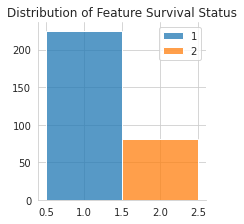

In [186]:
print(df['Survival_Status'].value_counts())
# balanced-dataset vs imbalanced datasets

import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(df,hue='Survival_Status')
g.map_dataframe(sns.histplot,x='Survival_Status')
plt.title("Distribution of Feature Survival Status")
plt.legend()


From the above EDA we can conlcude that:
1. The given Dataset is imbalanced.


## 1.6 Summary statistics:

In [187]:
df.describe()

,Age,Operation_Year,No_of_Axiallary_Nodes,Survival_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


## 1.7 Check for number of missing values in each feature:

In [188]:
df[df.isna()].count() # To count number of missing values in every feature

Age                      0
Operation_Year           0
No_of_Axiallary_Nodes    0
Survival_Status          0
dtype: int64

From the above EDA it is clear that there is no missing values in any of the feature.

# 2. Explaining the Objective:

1. Objective is to Predict whether the patient survived 5 years or longer ie, CLASS 1 OR the patient died within 5 years ie, CLASS 2.

2. Which Features are more important in predicting the Dependent Feature (ie, Survival Status).


# 3. Univariate Analysis:

## 3.1 1-D Scatter Plot:

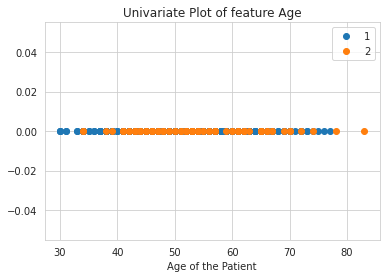

In [189]:
#1-D scatter plot of Age of Patient:
import numpy as np
import matplotlib.pyplot as plt

Survival_1 = df.loc[df["Survival_Status"] == 1]
Survival_2 = df.loc[df["Survival_Status"] ==2] 

plt.plot(Survival_1["Age"], np.zeros_like(Survival_1['Age']), 'o') 
# plt.plt(x,y):- plots plot between x and y values. Since we want 1-D plot, 
# we are creating labels of y-axis as all zeroes as y-axis.

plt.plot(Survival_2["Age"], np.zeros_like(Survival_2['Age']), 'o')
plt.title("Univariate Plot of feature Age")
plt.xlabel("Age of the Patient")
plt.legend(('1','2'))
plt.show()



From the above 1-D scatter plot of feature "Age", we can observe that there is lot of points are overlapping and we can't distinguish between Class 1 and Class 2 points.

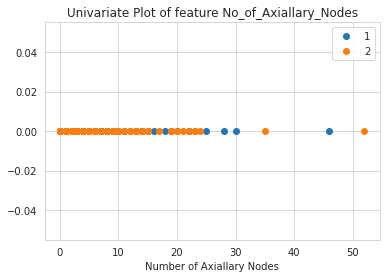

In [214]:
#1-D scatter plot of No_of_Axiallary_Nodes of Patient:
import numpy as np
import matplotlib.pyplot as plt

Survival_1 = df.loc[df["Survival_Status"] == 1]
Survival_2 = df.loc[df["Survival_Status"] ==2] 


plt.plot(Survival_1["No_of_Axiallary_Nodes"], np.zeros_like(Survival_1['No_of_Axiallary_Nodes']), 'o') 
# plt.plt(x,y):- plots plot between x and y values. Since we want 1-D plot, 
# we are creating labels of y-axis as all zeroes as y-axis.

plt.plot(Survival_2["No_of_Axiallary_Nodes"], np.zeros_like(Survival_2['No_of_Axiallary_Nodes']), 'o')
plt.legend(('1','2'))
plt.title("Univariate Plot of feature No_of_Axiallary_Nodes")
plt.xlabel("Number of Axiallary Nodes")
plt.show()

Observation:
1. Most of the axiallary nodes lie between 0 and 30.

## 3.2 Distribution of feature with pdf plot:
### 3.2.1 Distribution of feature "Age" using pdf:

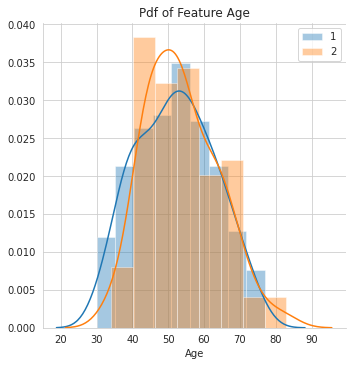

In [191]:
# distplot of Age over different survival status:
sns.FacetGrid(df, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Age") 
plt.title("Pdf of Feature Age")
plt.legend()
plt.show();

### 3.2.2 Distribution of feature "Operation_Year	" using pdf:

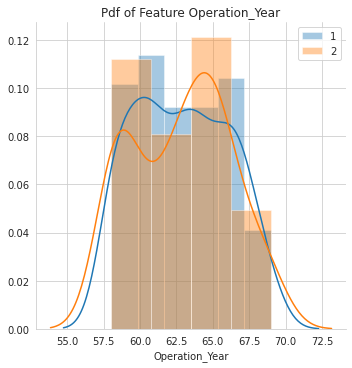

In [192]:
# distplot of Operation_Year over different survival status:
sns.FacetGrid(df, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Operation_Year")
plt.title("Pdf of Feature Operation_Year")
plt.legend()
plt.show();

### 3.2.3 Distribution of feature "No_of_Axiallary_Nodes" using pdf:

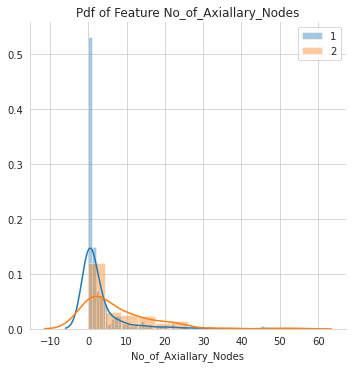

In [193]:
# distplot of No_of_Axiallary_Nodes over different survival status:
sns.FacetGrid(df, hue="Survival_Status", size=5) \
   .map(sns.distplot, "No_of_Axiallary_Nodes") 
plt.title("Pdf of Feature No_of_Axiallary_Nodes")
plt.legend()
plt.show();

From the above plot we can observe that : 
1. As we can observe some separtion between class 1 and class 2, hence the feature "No_of_Axiallary_Nodes" is important in predicting the class label (Survival_Status).

2. For the patients with no_of_Axiallary_Nodes < 5 there is a high probability that the patient survived 5 years or longer.

3. For patients with 0 axiallary nodes, there is less probability that patient could die within 5 years.

4. And there are lot of patients with number of axiallary nodes between 0 to 10.

## 3.3 Plot of cdf for feature "no_of_Axiallary_Nodes"
### 3.3.1 Plot of PDF and CDF for patients with Survival Status = 1

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
****************************************************************************************************
[ 4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


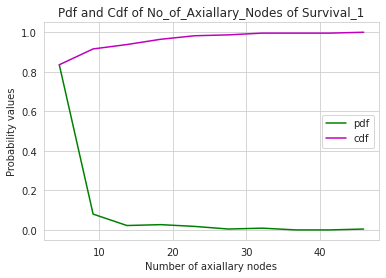

In [194]:
# Plots of CDF of No_of_Axiallary_Nodes for different Survival Status.

# Survival_1
counts, bin_edges = np.histogram(Survival_1['No_of_Axiallary_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print("*"*100)
print(bin_edges[1:]) # bin_edges starting from index 1.
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,color='g') # plot of bin_edges vs pdf and bin_edges starting from index 1.
plt.plot(bin_edges[1:], cdf,color='m')
plt.title("Pdf and Cdf of No_of_Axiallary_Nodes of Survival_1")
plt.xlabel('Number of axiallary nodes')
plt.ylabel('Probability values')
plt.legend(('pdf','cdf'))
plt.show()

From the above CDF, we observe that:
1. there is 90% probability of finding the patients(Survival_Status=1) with number of axiallary nodes < 10.

2. And there are very few patients with high number of axiallary nodes in class 1 ie, Survival_Status=1.

### 3.3.2 Plot of PDF and CDF for patients with Survival Status = 2

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


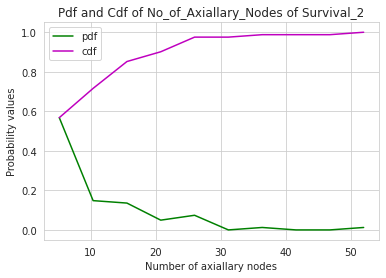

In [195]:
# Survival_2
counts, bin_edges = np.histogram(Survival_2['No_of_Axiallary_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,color='g') # plot of bin_edges vs pdf and bin_edges starting from index 1.
plt.plot(bin_edges[1:], cdf,color='m')
plt.title("Pdf and Cdf of No_of_Axiallary_Nodes of Survival_2")
plt.xlabel('Number of axiallary nodes')
plt.ylabel('Probability values')
plt.legend(('pdf','cdf'))
plt.show()

From the above CDF, we observe that:
1. there is nearly 70% probability of finding the patients(Survival_Status=1) with number of axiallary nodes < 10.

2. And there are very less patients with the
number of axiallary nodes>30 in class 2 ie, Survival_Status=2.

## 3.4 Univariate analysis using Boxplot:
## 3.4.1 Boxplot using feature "No_of_Axiallary_Nodes":

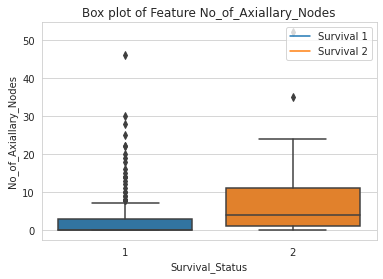

In [196]:
sns.boxplot(x='Survival_Status',y='No_of_Axiallary_Nodes', data=df)
plt.title('Box plot of Feature No_of_Axiallary_Nodes')
ax = plt.subplot()
p1, = ax.plot([0],label="Survival 1")
p2, = ax.plot([1],label="Survival 2")

plt.title('Box plot of Feature No_of_Axiallary_Nodes')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,loc=1) # loc=1, refers to upper right

plt.show()

From the above Boxplot using "Number of axiallary nodes" as feature we can observe that:

1. When the number of axiallary nodes > 75th percentile of class 1 data points,then the survival status belonging to class 2 is very high.

2. There are lot of outlier points in class 1 (could be because the  dataset is imbalanced).

## Finding the Outlier points in the Survival_1 dataframe :
## Calculating Quantiles:

In [197]:
# Handling Outliers:
Q = np.percentile(Survival_1['No_of_Axiallary_Nodes'],np.arange(0,100,25)) 
print(Q)
IQR = Q[3]-Q[1]
Out_A= Q[2] - 1.5*IQR # Outlier 
Out_B= Q[2] + 1.5*IQR # Outlier

count=0
Outliers_In_Survival1=[]
for i in (Survival_1['No_of_Axiallary_Nodes']):
  if(i>=Out_B):
    Outlier_B = i
    count +=1
    Outliers_In_Survival1.append(Outlier_B)
print(Outliers_In_Survival1)
print("Number of outliers in data with survival status =1 is :",count)

print("\nPercentiles:")
print("percentiles of patients with survival status = 1 is :",np.percentile(Survival_1["No_of_Axiallary_Nodes"],np.arange(0, 100, 25))) #[0th per,25th per,50th per,100th percentile]
print("percentiles of patients with survival status = 2 is :",np.percentile(Survival_2["No_of_Axiallary_Nodes"],np.arange(0, 100, 25)))

[0. 0. 0. 3.]
[10, 30, 10, 7, 13, 6, 15, 11, 5, 8, 8, 20, 14, 16, 14, 6, 12, 8, 6, 7, 5, 7, 46, 7, 19, 18, 22, 9, 7, 25, 8, 6, 9, 28, 22, 14, 8]
Number of outliers in data with survival status =1 is : 37

Percentiles:
percentiles of patients with survival status = 1 is : [0. 0. 0. 3.]
percentiles of patients with survival status = 2 is : [ 0.  1.  4. 11.]



## 3.4.2 Boxplot using feature "Age":

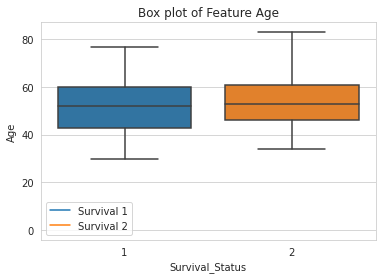

In [202]:
sns.boxplot(x='Survival_Status',y='Age',data=df)
plt.title('Box plot of Feature Age')
ax = plt.subplot() # the Axes is a part of that canvas on which we will make a particular visualization.
p1, = ax.plot([0],label="Survival 1")
p2, = ax.plot([1],label="Survival 2")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,loc=3) # loc=3, refers to lower left
plt.show()

Observation from above plot:
1. Most of the points are overlapping and no much distinction using feature "Age".


## 3.4.3 Boxplot using feature "Operation_Year":

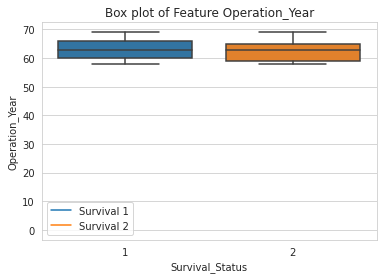

In [203]:
sns.boxplot(x='Survival_Status',y='Operation_Year',data=df)
plt.title('Box plot of Feature Operation_Year')
ax = plt.subplot() # the Axes is a part of that canvas on which we will make a particular visualization.
p1, = ax.plot([0],label="Survival 1")
p2, = ax.plot([1],label="Survival 2")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,loc=3) # loc=3, refers to lower left
plt.show()

Observation from above plot:
1. Most of the points are overlapping and no much distinction using feature "Operation_Year".

## 3.5 Violin Plots:
### 3.5.1 Violin Plot for feature "No_of_Axiallary_Nodes" :

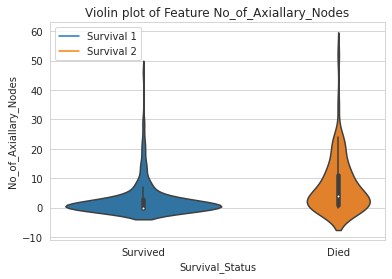

In [180]:
sns.violinplot(x="Survival_Status", y="No_of_Axiallary_Nodes", data=df, size=8)
plt.title('Violin plot of Feature No_of_Axiallary_Nodes')
ax = plt.subplot() # the Axes is a part of that canvas on which we will make a particular visualization.
p1, = ax.plot([0],label="Survival 1")
p2, = ax.plot([1],label="Survival 2")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,loc=2) # loc=2 refers to upper right
plt.show()

From the above plot, we can observe that:
1. The distribution of No_of_axiallary Nodes is Right Skewed in both points belonging to class1 and class2.

2. There are lot of no_of_axiallary nodes between 0 to 10.

### 3.5.2 Violin Plot for feature "Age" :

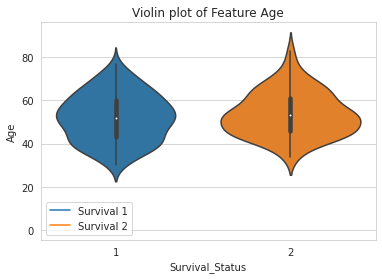

In [172]:
sns.violinplot(x="Survival_Status", y="Age", data=df, size=8)
plt.title('Violin plot of Feature Age')
ax = plt.subplot() # the Axes is a part of that canvas on which we will make a particular visualization.
p1, = ax.plot([0],label="Survival 1")
p2, = ax.plot([1],label="Survival 2")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,loc=3) # loc=3 refers to lower left.
plt.show()

### From the above plot we observe that:
1. There are lot points between 25th percentile and 75th percentile of the feature Age(in both Class 1 and Class 2).


### 3.5.3 Violin Plot for feature "Operation_Year" :

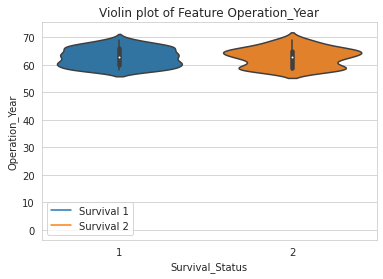

In [204]:
sns.violinplot(x="Survival_Status", y="Operation_Year", data=df, size=8)
plt.title('Violin plot of Feature Operation_Year')
ax = plt.subplot() # the Axes is a part of that canvas on which we will make a particular visualization.
p1, = ax.plot([0],label="Survival 1")
p2, = ax.plot([1],label="Survival 2")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,loc=3)
plt.show()

1. Operation_Year is not an important feature for determining Survival_Status of a patient

# 4.Bivariate Analysis:
## 4.1 Scatter Plot:
### 4.1.1 Age vs Operation Year:

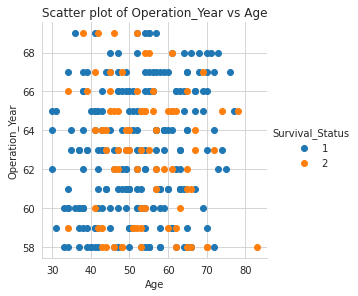

In [205]:

sns.set_style("whitegrid"); # creating the whitegrid background
# g = sns.FacetGrid(iris) :- This creates a an object of FacetGrid with empty plot (with ticks)
g= sns.FacetGrid(df, hue="Survival_Status", size=4) 
g.map(plt.scatter, "Age", "Operation_Year") 
g.add_legend();
plt.title("Scatter plot of Operation_Year vs Age")
plt.show();



1. There is no separation in the above plot and it is jumbled.

### 4.1.2 Age vs No_of_Axiallary_Nodes:

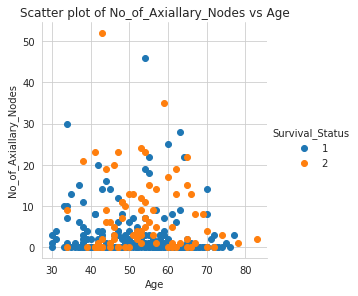

In [206]:
sns.set_style("whitegrid"); 
g= sns.FacetGrid(df, hue="Survival_Status", size=4) 
g.map(plt.scatter, "Age", "No_of_Axiallary_Nodes") 
g.add_legend();
plt.title("Scatter plot of No_of_Axiallary_Nodes vs Age")
plt.show();


### 4.1.3 Operation Year vs No_of_Axiallary_Nodes:

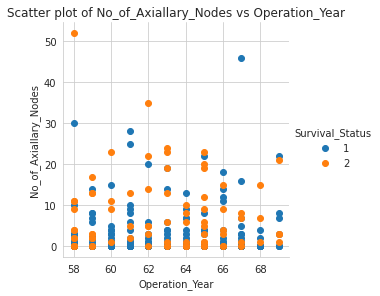

In [207]:
sns.set_style("whitegrid"); 
g= sns.FacetGrid(df, hue="Survival_Status", size=4) 
g.map(plt.scatter, "Operation_Year", "No_of_Axiallary_Nodes") 
g.add_legend();
plt.title("Scatter plot of No_of_Axiallary_Nodes vs Operation_Year")
plt.show()


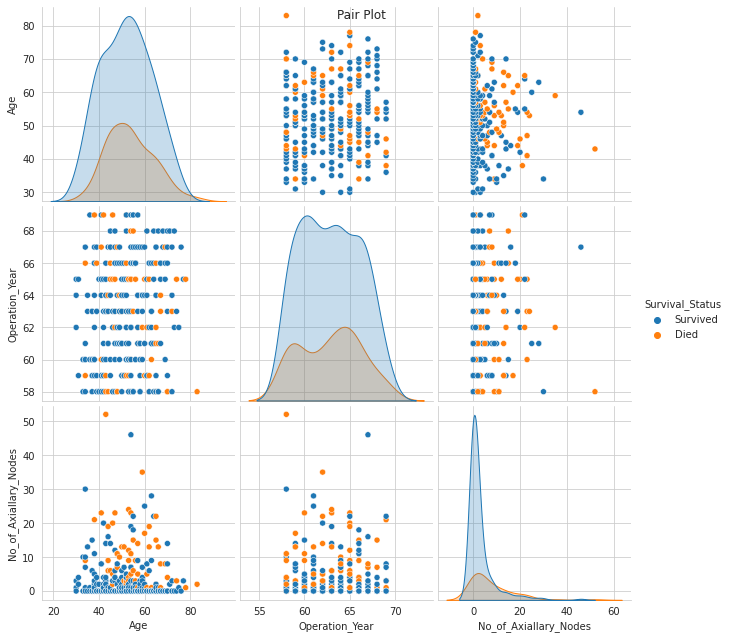

In [211]:

plt.close();
df["Survival_Status"] = df["Survival_Status"].apply(lambda x: "Survived" if x == 1 else "Died")
sns.set_style("whitegrid");
sns.pairplot(df , hue="Survival_Status", size=3);
plt.suptitle("Pair Plot")
plt.show();

Observation:
1. No_of_axiallary nodes is not dependent on Operation year and simillaryly No of axiallary nodes is not dependent on Age of the patient.

2. Features like Age and Operation Year are not that helpful in predicting the Survival Status of the patient.


### 4.1.4 Multivariate probability density, contour plot:

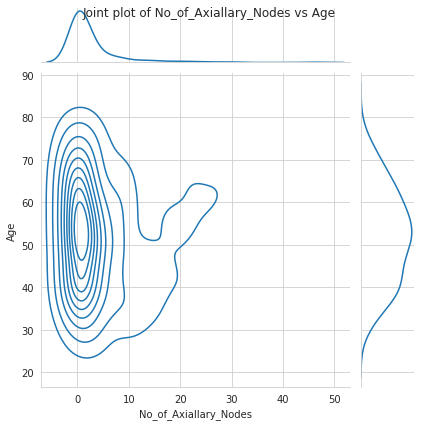

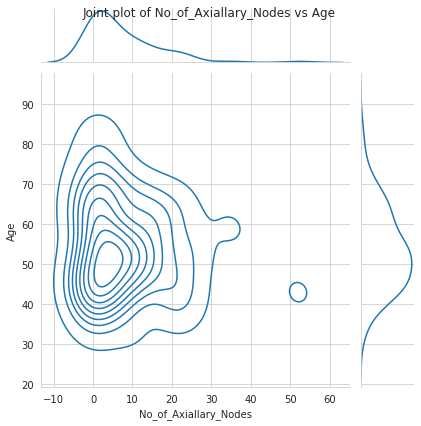

In [212]:
sns.jointplot(x="No_of_Axiallary_Nodes", y="Age", data=Survival_1, kind="kde");
plt.suptitle("Joint plot of No_of_Axiallary_Nodes vs Age")
plt.show();

sns.jointplot(x="No_of_Axiallary_Nodes", y="Age", data=Survival_2, kind="kde");
plt.suptitle("Joint plot of No_of_Axiallary_Nodes vs Age")
plt.show();

Observation:
1. There is no relationship between Age and No_Of_Axiallary nodes.

## Conclusions:
1. Number of Axiallary Nodes is an important feature in predicting the Survival_Status of the patient.

2. As the number of axillary nodes increase the chance of survival of patient for more than 5years or longer decreases and also sometimes patients with zero axiallary nodes have died. It means that patients having zero axiallary nodes does not gurantee that the patient will survive for 5 years or longer.

3. Age and Operation_Year features are not that helpful in predicting the survival_status of the patient.

4. With these available features, probability of mis-classifying new query point is very high.

